In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
import sklearn.metrics
%matplotlib inline

In [4]:
df = pd.read_csv('cars_multivariate.txt')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')
df = df[~df.horsepower.isna()]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model           392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [16]:
df.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model           0.580541
mpg             1.000000
Name: mpg, dtype: float64

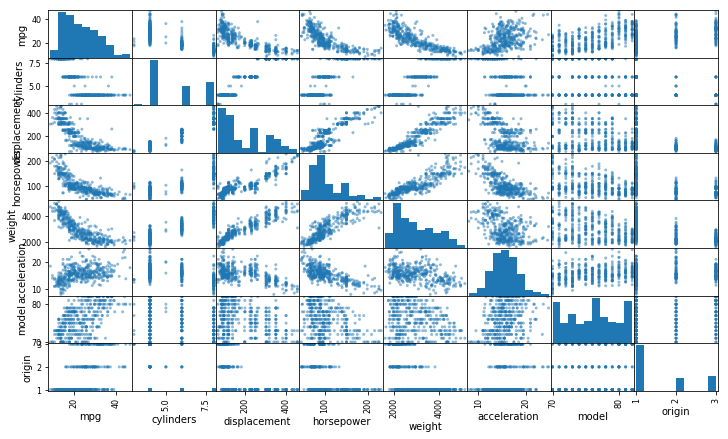

In [19]:
scatter_matrix(df, figsize=(12,7));

In [23]:
df = sm.add_constant(df)
df.head()

,const,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,1.0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1.0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,1.0,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,1.0,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,1.0,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [41]:
y = df.mpg
X = df[['const', 'weight', 'model']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((274, 3), (118, 3), (274,), (118,))

In [44]:
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     575.7
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.72e-98
Time:                        09:11:55   Log-Likelihood:                -723.27
No. Observations:                 274   AIC:                             1453.
Df Residuals:                     271   BIC:                             1463.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.9741      4.928     -2.633      0.009     -22.676      -3.272
weight        -0.0066      0.000    -25.800      0.000      -0.007      -0.006
model          0.7367      0.061     12.109      0.000       0.617       0.856
==============================================================================
Omnibus:                       23.400   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.642
Skew:                           0.561   Prob(JB):                     3.00e-08
Kurtosis:                       4.333   Cond. No.                     7.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'studentized residuals')

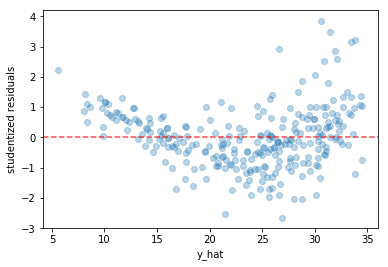

In [45]:
# plot studentized residuals
st_res = result.outlier_test()['student_resid']
yhat = result.fittedvalues
plt.scatter(yhat, st_res, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('y_hat')
plt.ylabel('studentized residuals')

In [80]:
y_hat = result.predict(X_test)

In [81]:
def r2(y, y_hat):
    return 1-((y-y_hat)**2).sum()/((y-y.mean())**2).sum()
def rmse(y, y_hat):
    return (((y-y_hat)**2).sum()/y.shape[0])**0.5

In [82]:
r2(y_test, y_hat), sklearn.metrics.r2_score(y_test, y_hat)

(0.8045083595264546, 0.8045083595264546)

In [83]:
rmse(y_test, y_hat), sklearn.metrics.mean_squared_error(y_test, y_hat) ** 0.5

(3.475777408416691, 3.475777408416691)